In [80]:
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
import seaborn as sns

# Identifying 'Funding Desserts' Across the US

### Donation Data

In [71]:
donation = pd.read_csv("donorschooseorg_challenge_donation.csv")
donation.head()

,Unnamed: 0,donor_hashed_id,donor_state,project_hashed_id,donation_hashed_id,donation_message,donation_amount,donation_date,donation_is_teacher_referred
0,0,ef334cd67d91c347230d24ae6b5a1dd2,New York,11205d09df1a9f083c105c252f429507,0aca331938a353947999832bf9328fb6,NaN,25.00,2018-11-01,No
1,1,b9f04b500f9bb13b65a60822807e709e,Pennsylvania,a9e79d6a3f75af1199d45034f6714096,326c0a8a6813c4758ad1ff3a3017526d,NaN,208.27,2018-11-01,No
2,2,f6d0642a830066269755ad3e36da9ab1,California,23da4d867721eb25d627da9c52cb10f7,f4b5462a0e7412efcbbe6ec7ed91d37e,NaN,95.25,2018-11-01,No
3,3,f6d0642a830066269755ad3e36da9ab1,California,8a87ed4a90876d1147e41a5888641c79,aa2b5fa009ce11a6d1a90176b4cff146,NaN,137.89,2018-11-01,No
4,4,0ad43a0a7c329323185e424170c97fb7,California,02b75b96ad12898cf0e63be356c7bb1a,990c46cac2bdcfba4ffe14d7b54fb099,David told me about this. Great cause and best...,43.15,2018-11-01,No


### Schools Data

In [3]:
schools = pd.read_csv("donorschooseorg_challenge_school.csv")
schools.head()

,Unnamed: 0,school_hashed_id,school_address_state,school_address_city,school_address_district,school_dist_percent_ell_students,school_bilingual_prgm,school_esl_prgm,school_dist_number_ell_students,school_metro_type,school_percentage_free_lunch
0,0,d9c07a2b76b79d658cb62ce39f73b1da,Wisconsin,Eau Claire,Eau Claire Area School Dist,3.0,No,No,3.0,urban,40.0
1,1,146f2ec953a680ab8eb9bd8ce5b59868,South Carolina,Sumter,Sumter School District,NaN,No,No,3.0,urban,76.0
2,2,6b380bfdbe5a964711fe883d1bfb26df,Illinois,Chicago,Chicago Psd-Network 5,NaN,No,No,3.0,urban,95.0
3,3,682b672958a49aef821db0a716a98577,New York,New York City,New York City Dept Of Ed,1.0,No,No,3.0,urban,82.0
4,4,043f2e6bc8b60312359ca90aa8a01d62,Florida,Molino,Escambia Co School District,1.0,No,No,3.0,rural,62.0


### Project Data

In [4]:
project = pd.read_csv('donorschooseorg_challenge_project.csv').drop(['project_essay_one', 'project_essay_two', 'project_subj_subcat_tree', 'project_impact_letter'], axis=1)
project.head()

,Unnamed: 0,project_hashed_id,project_title,project_cost,project_posted_date,project_funded_date,project_subj_cat_tree,project_grade_cat,project_resource_type,teacher_hashed_id,school_hashed_id
0,0,e80079d9de118490d37643fa6dadd806,Words are the Beginning to So Many Journeys!,357.60,2018-11-01,NaN,Literacy & Language,Grades 3-5,materials,6684cc9bb4d8be1d99722d4273f7bee2,cfc1e0138960a65cd27b166cf67d9e8b
1,1,f98c0bebcd7aa0df8a5965ad9f35c57d,Spice Up Our Technology!,201.22,2018-11-01,NaN,Math & Science,Grades 3-5,materials,4102a4a99a540232d657d4789391ac36,9919d634d4edb19c3660dc3342e15da0
2,2,c7acba160590697707f4d6d58c512c08,Can You Build It?,622.75,2018-10-31,2018-10-31,Math & Science,Grades 9-12,materials,7e9fb443bfbeaaad89a93a4742efac75,a998da284b1b6edc3e8a2de59753675d
3,3,0f57de4cf57128dbd8a962d050f4f3e5,Putting the MUsic in MUtes - Trombone Edition,848.38,2018-10-31,2018-10-31,Music & The Arts,Grades 9-12,materials,dc18c15a85115dfbba924b5eedd0e58e,c79bd65959038a6fbd03893b5f323339
4,4,0256a1fa7798d1680d6d3e5a43a777d2,Tablets for Differentiating Instruction,799.48,2018-10-31,2018-10-31,Literacy & Language,Grades PreK-2,materials,30faba25220bb299fc2e9825e6c89438,3b4a6df3881bdc2154d9b09e8a92e10d


### Arrivals Data

#### Serving as a Proxy for current refugee population across the US

In [5]:
arrivals = pd.read_csv('Arrivals_by_Destination_and_Nationality_2010-2018.csv')
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Indiana', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York','North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota','Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

/Users/Maria/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
arrivals = arrivals.rename(columns={'Assur_DestinationCity1': 'city', 'calendar_year': 'year', 'total_per_state_city': 'total_per_city', 'total_by_state': 'total_per_state'})[arrivals['state'].isin(states)]


In [7]:
arrivals.head(10)

,state,year,total_per_state,nationality,total_per_state_nationality,city,total_per_city,total_year
0,Alabama,CY 2010,153,Afghanistan,8,Mobile,8,"71,361"
1,Alabama,CY 2011,86,Afghanistan,5,Mobile,5,"51,458"
2,Alabama,CY 2012,149,Afghanistan,7,Mobile,7,"66,292"
3,Alabama,CY 2013,122,Afghanistan,9,Mobile,9,"66,066"
4,Alabama,CY 2014,116,Afghanistan,1,Mobile,1,"72,820"
5,Alabama,CY 2015,97,Afghanistan,0,Mobile,0,"66,517"
6,Alabama,CY 2016,120,Afghanistan,9,Mobile,9,"96,874"
7,Alabama,CY 2017,50,Afghanistan,9,Mobile,9,"33,368"
8,Alabama,CY 2018,35,Afghanistan,0,Mobile,0,"16,247"
9,Alabama,CY 2010,153,Burma,0,Auburn,0,"71,361"


### Merging and Cleaning DataFrames

In [8]:
merge_schools_donor = donation.merge(project, left_on='project_hashed_id', right_on='project_hashed_id')
merge_SchoolsDonor_location = merge_schools_donor.merge(schools, left_on='school_hashed_id', right_on='school_hashed_id')
merge_SchoolsDonor_location.head()

,Unnamed: 0_x,donor_hashed_id,donor_state,project_hashed_id,donation_hashed_id,donation_message,donation_amount,donation_date,donation_is_teacher_referred,Unnamed: 0_y,...,Unnamed: 0,school_address_state,school_address_city,school_address_district,school_dist_percent_ell_students,school_bilingual_prgm,school_esl_prgm,school_dist_number_ell_students,school_metro_type,school_percentage_free_lunch
0,0,ef334cd67d91c347230d24ae6b5a1dd2,New York,11205d09df1a9f083c105c252f429507,0aca331938a353947999832bf9328fb6,NaN,25.0,2018-11-01,No,21819,...,41249,New York,New York City,New York City Dept Of Ed,NaN,No,No,NaN,urban,95.0
1,147,c46384bdf7b8fe7873e6fc92e2887858,New York,11205d09df1a9f083c105c252f429507,725afc5efd2131836df4f725d84f44a1,Reading & writing is very important. If this ...,50.0,2018-10-31,No,21819,...,41249,New York,New York City,New York City Dept Of Ed,NaN,No,No,NaN,urban,95.0
2,173,c08dcebf562a1e3d3aaa35774ca9dfb4,New York,11205d09df1a9f083c105c252f429507,8918c1b3f05246917ef7af084fa64b1c,For the best teacher I ever had I love you Mrs...,15.0,2018-10-31,No,21819,...,41249,New York,New York City,New York City Dept Of Ed,NaN,No,No,NaN,urban,95.0
3,207,a1c5e38829939eab408a55bad91f8e9b,New York,11205d09df1a9f083c105c252f429507,2811b4b96890eaac866954bdf23987ff,"“Teachers who love teaching, teach children to...",25.0,2018-10-31,No,21819,...,41249,New York,New York City,New York City Dept Of Ed,NaN,No,No,NaN,urban,95.0
4,337,b05afb15d69419f9622a0b414d7d1bd9,New York,11205d09df1a9f083c105c252f429507,6efe92b4ea4db274fecefcbabc9c5e4a,Because of this class I knew what I wanted to ...,50.0,2018-10-30,No,21819,...,41249,New York,New York City,New York City Dept Of Ed,NaN,No,No,NaN,urban,95.0


In [9]:
grouped_by_city_donation = merge_SchoolsDonor_location.groupby(['school_address_state', 'school_address_city'])['donation_amount'].sum().to_frame()
grouped_by_city_donation.rename(columns={'school_Address_state': 'state', 'school_address_city': 'city'})

donation_amount
school_address_state school_address_city                 
Alabama              Abbeville                     260.00
                     Adamsville                   1386.38
                     Alabaster                    3673.06
                     Albertville                 13043.96
                     Alex City                    1327.98
                     Alexandria                     50.00
                     Aliceville                    227.00
                     Altoona                      3207.88
                     Andalusia                    2106.67
                     Anniston                     6404.95
                     Arab                          715.00
                     Ardmore                       194.45
                     Ariton                        230.87
                     Ashford                       859.00
                     Ashland                       791.84
                     Ashville                      300.00
                     Athens                       4174.11
                     Atmore                        857.16
                     Attalla                       409.00
                     Auburn                      20386.27
                     Axis                          349.00
                     Baileyton                    1138.36
                     Banks                         220.00
                     Bay Minette                  1771.71
                     Bayou Labatre                 825.00
                     Beatrice                      473.60
                     Bessemer                     2963.20
                     Big Cove                      254.00
                     Billingsley                  3603.23
                     Birmingham                  98504.95
...                                                   ...
Wyoming              Fort Washakie                1205.36
                     Gillette                     2601.55
                     Glenrock                      624.53
                     Green River                   220.00
                     Greybull                      440.00
                     Hulett                          0.00
                     Jackson                      1919.99
                     Lander                       1956.60
                     Laramie                      2110.00
                     Medicine Bow                  100.00
                     Moorcroft                     940.40
                     Mountain View                 316.96
                     Pine Bluffs                    25.00
                     Pinedale                      224.00
                     Powell                        192.38
                     Rawlins                      1399.00
                     Riverton                      375.00
                     Rock River                    655.00
                     Rock Springs                  461.92
                     Saratoga                      545.00
                     Sheridan                       99.00
                     St Stephens                   217.00
                     Sundance                       30.00
                     Thermopolis                    75.00
                     Torrington                     35.00
                     Upton                         692.61
                     Wheatland                     965.00
                     Worland                      2331.06
                     Wright                        806.74
                     Yoder                          25.00

[13261 rows x 1 columns]

In [10]:
grouped_by_city_donation.head(20)

donation_amount
school_address_state school_address_city                 
Alabama              Abbeville                     260.00
                     Adamsville                   1386.38
                     Alabaster                    3673.06
                     Albertville                 13043.96
                     Alex City                    1327.98
                     Alexandria                     50.00
                     Aliceville                    227.00
                     Altoona                      3207.88
                     Andalusia                    2106.67
                     Anniston                     6404.95
                     Arab                          715.00
                     Ardmore                       194.45
                     Ariton                        230.87
                     Ashford                       859.00
                     Ashland                       791.84
                     Ashville                      300.00
                     Athens                       4174.11
                     Atmore                        857.16
                     Attalla                       409.00
                     Auburn                      20386.27

In [11]:
arrivals['total_per_city'] = arrivals['total_per_city'].replace(to_replace=r'[^0-9]', value='', regex=True).astype(int)

In [12]:
grouped_by_city_state_pop = arrivals.groupby(['state', 'city'])['total_per_city'].sum().to_frame()
grouped_by_city_state_pop.head()

total_per_city
state   city                       
Alabama Albertville               5
        Auburn                    1
        Bessemer                  3
        Birmingham               11
        Dadeville                 1

### Visualizations of 'Funding Desserts'

In [13]:
test = grouped_by_city_state_pop.reset_index()
test['ind'] = test['state'].str.cat(test['city'])
test.head()

,state,city,total_per_city,ind
0,Alabama,Albertville,5,AlabamaAlbertville
1,Alabama,Auburn,1,AlabamaAuburn
2,Alabama,Bessemer,3,AlabamaBessemer
3,Alabama,Birmingham,11,AlabamaBirmingham
4,Alabama,Dadeville,1,AlabamaDadeville


In [17]:
test2 = grouped_by_city_donation.reset_index()
test2['ind'] = test2['school_address_state'].str.cat(test2['school_address_city'])
test2.head()

,school_address_state,school_address_city,donation_amount,ind
0,Alabama,Abbeville,260.00,AlabamaAbbeville
1,Alabama,Adamsville,1386.38,AlabamaAdamsville
2,Alabama,Alabaster,3673.06,AlabamaAlabaster
3,Alabama,Albertville,13043.96,AlabamaAlbertville
4,Alabama,Alex City,1327.98,AlabamaAlex City


In [37]:
merged_arrivals_donation = test.merge(test2, left_on='ind', right_on='ind').drop(['ind', 'school_address_state', 'school_address_city'], axis=1)
merged_arrivals_donation.head()

,state,city,total_per_city,donation_amount
0,Alabama,Albertville,5,13043.96
1,Alabama,Auburn,1,20386.27
2,Alabama,Bessemer,3,2963.20
3,Alabama,Birmingham,11,98504.95
4,Alabama,Dadeville,1,347.07


In [38]:
merged_arrivals_donation['prop_donation_per_refugee'] = merged_arrivals_donation['donation_amount'] / merged_arrivals_donation['total_per_city']

In [46]:
greater_than_10 = merged_arrivals_donation[merged_arrivals_donation['total_per_city'] >= 16].sort_values('prop_donation_per_refugee', ascending=True)
greater_than_10.head(30)


,state,city,total_per_city,donation_amount,prop_donation_per_refugee
1743,South Dakota,Huron,818,209.68,0.256333
1440,New York,Utica,3229,1278.40,0.395912
1257,New Hampshire,Concord,1827,855.87,0.468456
579,Georgia,Clarkston,4129,3341.65,0.809312
1640,Pennsylvania,Broomall,20,25.00,1.250000
789,Iowa,Clive,172,215.00,1.250000
1107,Michigan,Southfield,4200,8176.63,1.946817
1102,Michigan,Rochester,36,78.49,2.180278
338,California,Turlock,1022,2385.78,2.334423
1317,New Jersey,Moorestown,42,100.00,2.380952


In [48]:
final_df = greater_than_10.drop(['total_per_city', 'donation_amount'], axis=1) 
final_df.head()

,state,city,prop_donation_per_refugee
1743,South Dakota,Huron,0.256333
1440,New York,Utica,0.395912
1257,New Hampshire,Concord,0.468456
579,Georgia,Clarkston,0.809312
1640,Pennsylvania,Broomall,1.250000


In [83]:
final_df_state = merged_arrivals_donation.groupby(['state'])['donation_amount'].sum().to_frame().reset_index()
final_df_pop = merged_arrivals_donation.groupby(['state'])['total_per_city'].sum().to_frame().reset_index()
new = final_df_pop.merge(final_df_state)
new['prop_per_refugee'] = new['donation_amount']/new['total_per_city']
new.head()

first_25 = new.iloc[0:25, :]
last_25 = new.iloc[25:50, :]

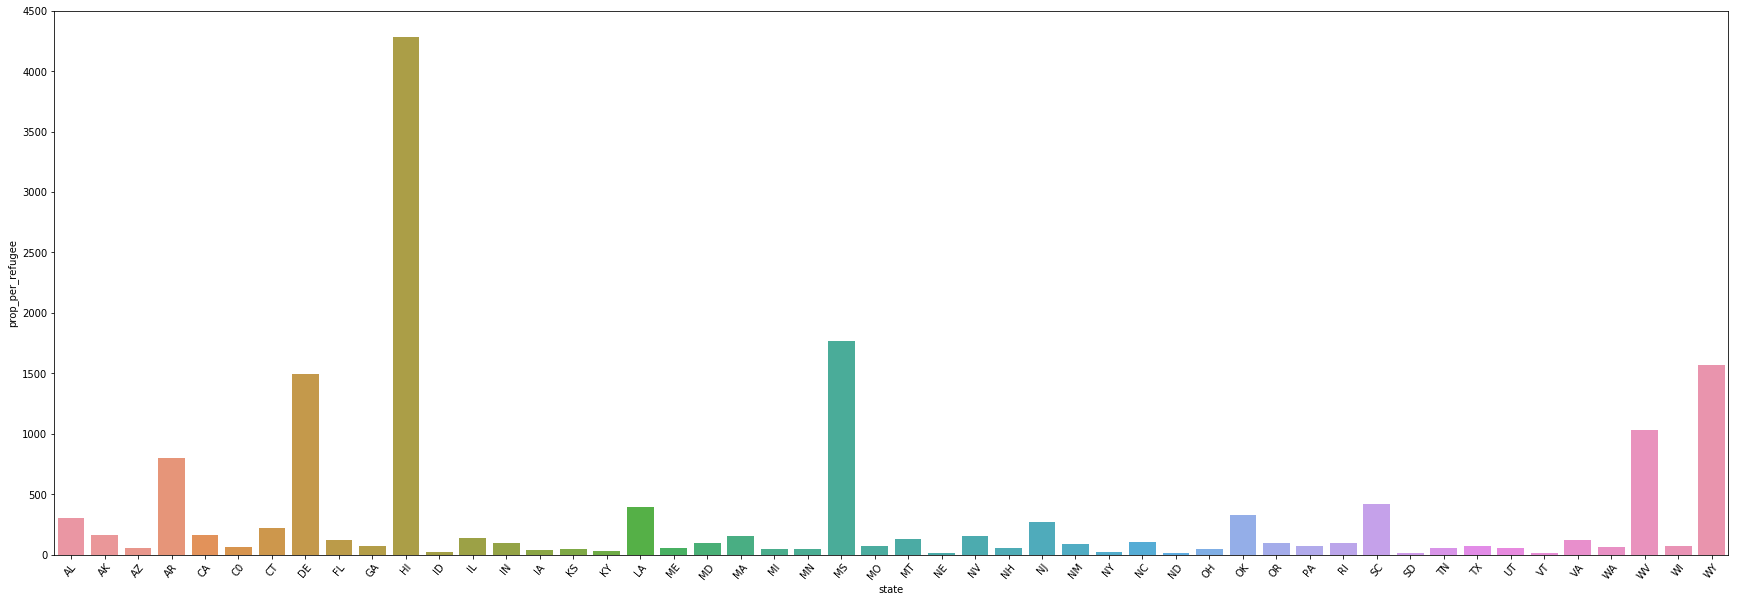

In [104]:
fig, ax = plt.subplots()
fig.set_size_inches(30,10)

labels = ['AL', 'AK', 'AZ', 'AR', 'CA', 'C0', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC','ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN','TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

barplot = sns.barplot(x=new['state'], y=new['prop_per_refugee'], ax=ax)
barplot.set_xticklabels(labels=labels, rotation=50);

In [49]:
import plotly.plotly as py
import pandas as pd

df = final_df

data = [ dict(
        type = 'choropleth',
        locations = df['state'],
        z = df['prop_donation_per_refugee'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            )
        ),
        tick0 = 0,
        zmin = 0,
        dtick = 1000,
        colorbar = dict(
            autotick = False,
            tickprefix = '$',
            title = 'GDP<br>Billions US$'
        ),
    ) ]

layout = dict(
    title = '2014 Global GDP<br>Source: \
<a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
CIA World Factbook</a>',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
url = py.plot(fig, filename='d3-world-map')

ModuleNotFoundError: No module named 'plotly'